# Optimal interpolation

In [566]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [567]:
# fraction of data to retain for mapping
frac = 0.2

# random error to add to observation
e = 1e-5

# length scale
a = 150

# choose the level
k = 9

In [568]:
# load the data
data = sio.loadmat('mercator_temperature')
x = data['x']
y = data['y']
data = data['temp'][k, :, :]
xx, yy = np.meshgrid(x, y)

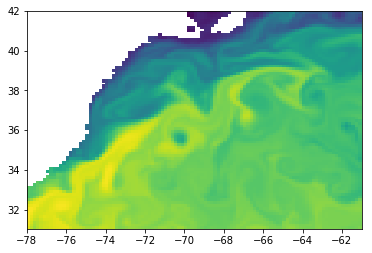

In [569]:
plt.pcolormesh(xx, yy, data)

In [570]:
# consider valid values and their locations
ival = np.isfinite(data)
xx = xx[ival]
yy = yy[ival]
data = data[ival]

In [571]:
data.shape

(6764,)

In [572]:
ikeep.shape

(1352,)

In [573]:
# sample data for the optimal interpolation problem
N = len(data)
ikeep = np.round(N*np.random.rand(int(frac*N)))
ikeep = ikeep.astype('int')
ikeep[np.where(ikeep>=N)]=[]
xx = xx[ikeep]
yy = yy[ikeep]
data = data[ikeep]

In [574]:
data.shape

(1352,)

Markov function

$$
C(r) = s^2 \left(1 + \frac{r}{a} \right) exp\left(-\frac{r}{a}\right)
$$

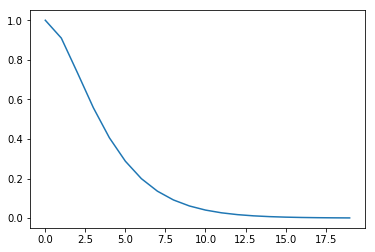

In [575]:
plt.plot(r, C)

In [576]:
# Get distances separating every pair of stations
# using approximate spherical geometry

radius = 6370800     # meters
lonm = np.mean(x)    # define the reference point
latm = np.mean(y)    # define the reference point
ykm = radius * (yy-latm) * np.pi/180 / 1000
xkm = radius * ((xx-lonm)* np.pi/180) * np.cos(np.pi/180*yy) / 1000

In [577]:
# Build matrices that repeat colums of x and rows of y.
# Then X-X.T and Y-Y.T will be all posible distance combinations
# between pairs of points
X = np.tile(xkm, [len(ykm), 1])
Y = np.tile(ykm, [len(xkm), 1])
Rdd = np.sqrt((X-X.T)**2 + (Y-Y.T)**2)

In [578]:
Cdd = (1+Rdd/a)*np.exp(-Rdd/a) + np.diag(e*np.random.randn(len(data)))

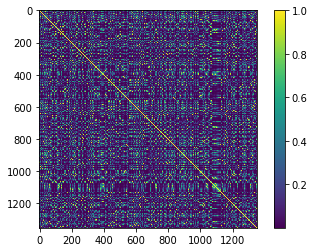

In [579]:
plt.imshow(Cdd)
plt.colorbar()

In [580]:
print(lonm, xtmp.mean())

-69.50000066664613 -69.5


In [581]:
# regular grid of coordinates to map data to
grdres = .1
xtmp = np.arange(x.min(), x.max()+grdres, grdres)
ytmp = np.arange(y.min(), y.max()+grdres, grdres)
[xg, yg] = np.meshgrid(xtmp, ytmp)
xg = xg.flatten()
yg = yg.flatten()

In [582]:
# Convert these to x,y in kilometers
ygkm = radius*(yg-latm)*np.pi/180/1000;
xgkm = radius*(np.pi/180*(xg-lonm))*np.cos(np.pi/180*yg)/1000;

In [583]:
xgkm[0]

-809.8907519322021

In [584]:
# distances between any pair of points
Xg = np.tile(xgkm, [len(ykm), 1]);
Xd = np.tile(xkm,[len(ygkm), 1]);
Yg = np.tile(ygkm,[len(xkm), 1]);
Yd = np.tile(ykm,[len(ygkm), 1]);
Rmd = np.sqrt((Xg.T-Xd)**2+(Yg.T-Yd)**2)

In [585]:
Cmd = (1+Rmd/a)*np.exp(-Rmd/a);

In [586]:
D = data.mean() + Cmd @ np.linalg.inv(Cdd) @ (data-data.mean())

In [587]:
data.mean()

16.792429553686514

In [588]:
nx = len(xtmp)
ny = len(ytmp)

In [589]:
estD = D.reshape(ny, nx)

In [590]:
nlon, nlat = np.meshgrid(xtmp, ytmp)

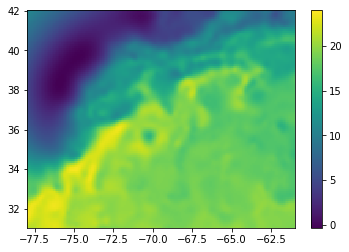

In [591]:
plt.pcolormesh(nlon, nlat, estD)
plt.colorbar()